In [1]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
import xgboost
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("Layout1.csv")
df.head()

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity,Energy_Consumption_Light,Energy_Consumption_HVAC,Energy_Consumption_Others,Total_Energy_Consumption
0,3,1.0,0.8,399.457034,1240.8769,30.374280,21.972234,89.9870,65.9872,0.000000,0.000000,0.000000,0.000000
1,4,0.9,0.6,414.111372,1354.8900,29.647268,18.383509,89.9654,65.9826,0.133301,2.952736,0.066271,3.152308
2,3,0.9,1.0,427.500606,1356.9000,32.290966,21.134369,89.6579,65.9780,0.121486,2.918206,0.057519,3.097212
3,4,0.8,1.0,426.535510,1456.9800,29.243687,21.967405,89.3504,65.9734,0.154176,1.452490,0.054401,1.661067
4,3,1.0,0.9,425.570414,1345.0900,30.309128,23.240612,89.0429,65.9688,0.074840,2.305990,0.054861,2.435691


In [3]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

No_Occupant
3    575
4    381
2    233
5    219
1    202
Name: count, dtype: int64
Met
0.80    171
0.95    126
0.98    123
0.70    120
0.96     95
1.10     92
0.91     82
0.99     79
0.90     79
0.87     76
1.11     74
0.85     69
0.89     58
0.97     50
0.83     49
0.60     48
1.12     48
1.21     39
0.86     39
1.00     31
0.84     20
1.30     19
1.20     14
0.88      4
1.13      2
1.22      1
1.33      1
0.82      1
Name: count, dtype: int64
Clo
0.656    185
0.887     87
0.832     80
0.821     79
0.843     79
        ... 
0.634      1
0.601      1
0.612      1
0.645      1
0.623      1
Name: count, Length: 63, dtype: int64
CO2_Outdoor
445.444032    79
445.715816    78
445.172248    78
444.628679    76
444.900464    75
              ..
445.254658     1
446.259384     1
445.987600     1
442.726190     1
439.226302     1
Name: count, Length: 95, dtype: int64
CO2_Indoor
1466.7839    79
1458.2292    78
1475.3386    78
1492.4480    76
1483.8933    75
             ..
1432.5651     1
1441.1

<Axes: >

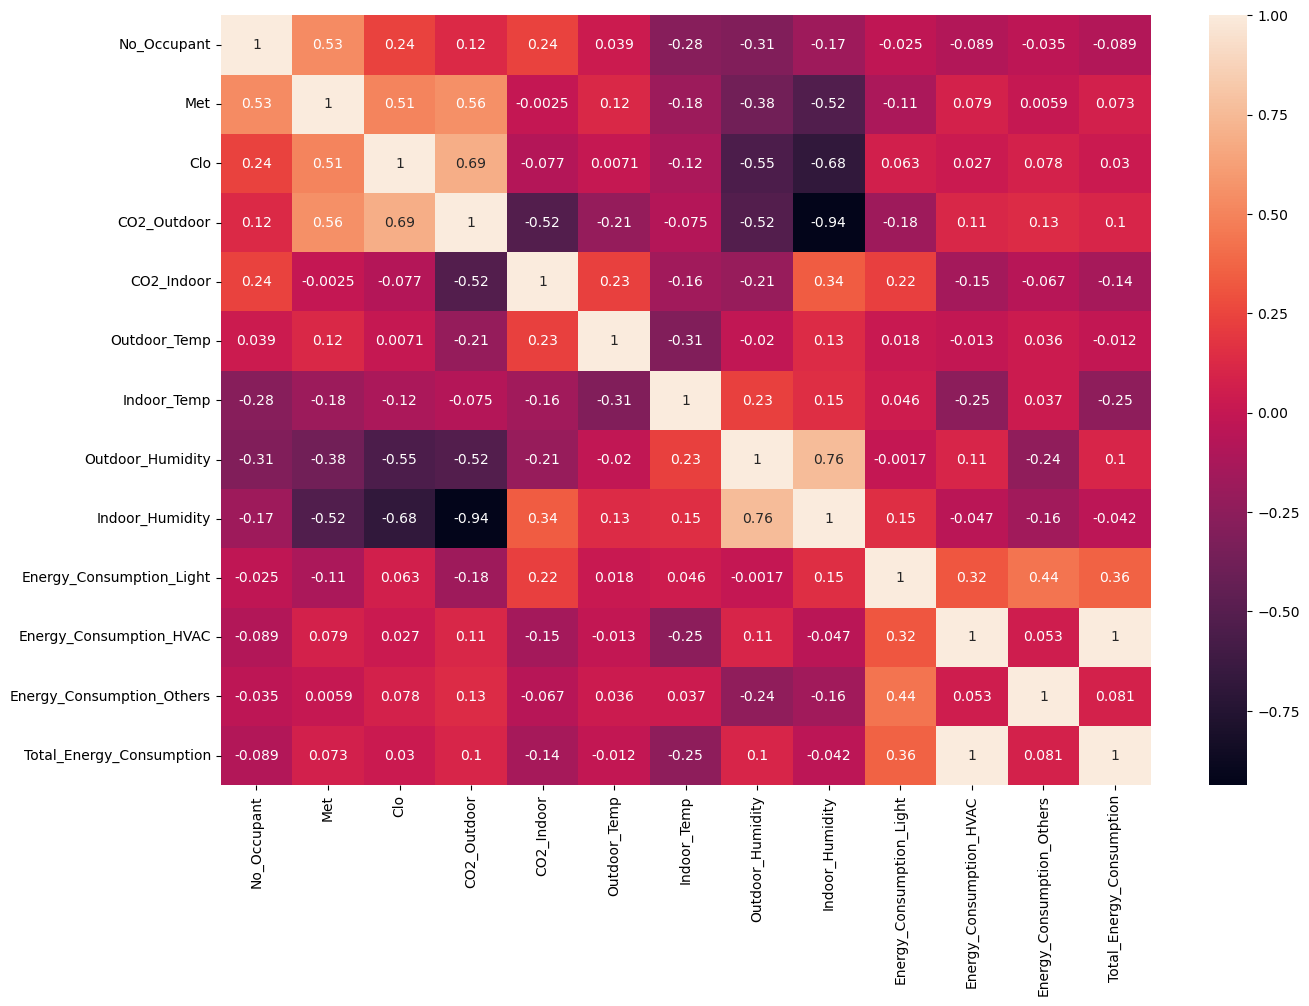

In [4]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [5]:
inputs = df.drop(['Energy_Consumption_Light','Energy_Consumption_HVAC', 'Energy_Consumption_Others', 'Total_Energy_Consumption'], axis=1)

In [6]:
target = df['Total_Energy_Consumption']

In [7]:
inputs

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity
0,3,1.00,0.800,399.457034,1240.8769,30.374280,21.972234,89.98700,65.987200
1,4,0.90,0.600,414.111372,1354.8900,29.647268,18.383509,89.96540,65.982600
2,3,0.90,1.000,427.500606,1356.9000,32.290966,21.134369,89.65790,65.978000
3,4,0.80,1.000,426.535510,1456.9800,29.243687,21.967405,89.35040,65.973400
4,3,1.00,0.900,425.570414,1345.0900,30.309128,23.240612,89.04290,65.968800
...,...,...,...,...,...,...,...,...,...
1605,3,0.98,0.568,425.160138,1421.7550,31.258981,21.849982,84.91180,61.949350
1606,3,0.96,0.579,426.164864,1407.4120,33.412066,22.078639,85.20260,61.667175
1607,1,0.85,0.656,438.410500,1328.4249,32.276028,23.272368,90.54236,59.708340
1608,1,0.85,0.656,437.625400,1321.9796,32.024826,20.695245,90.37248,59.949625


In [8]:
target

0       0.000000
1       3.152308
2       3.097212
3       1.661067
4       2.435691
          ...   
1605    2.760807
1606    2.651721
1607    1.901029
1608    2.833040
1609    4.493445
Name: Total_Energy_Consumption, Length: 1610, dtype: float64

<Axes: >

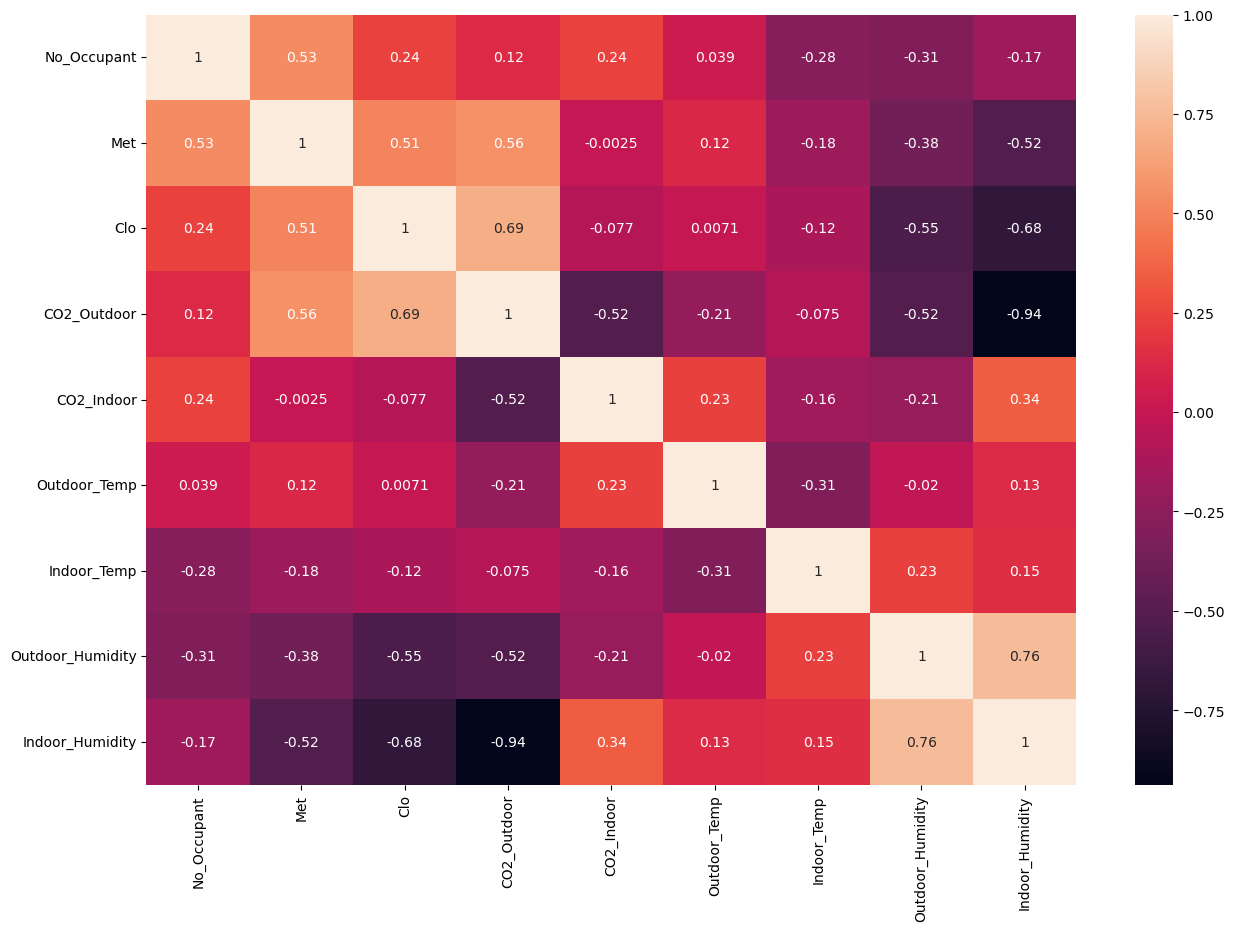

In [9]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(inputs.corr(),annot=True)

In [10]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [11]:
df['Total_Energy_Consumption'].value_counts()

Total_Energy_Consumption
2.696866    79
2.189607    78
2.525352    78
2.953962    76
1.982639    75
            ..
3.980170     1
4.439695     1
3.883525     1
2.455324     1
2.659507     1
Name: count, Length: 95, dtype: int64

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =42) # 75 - 25 split   (test_size=0.20)

In [15]:
xgb = XGBRegressor(n_estimators = 500, max_depth = 4, random_state = 42)

In [16]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
xgb.score(X_train, y_train)

0.9999986429141285

In [18]:
y_predict = xgb.predict(X_test)

result = xgb.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9460139954090929


In [19]:
y_predict = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.02
RMSE: 0.13


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [21]:
r2 = r2_score(y_test, y_predict)
print('\nR2 =', r2,) 


R2 = 0.9460139954090929


Text(0, 0.5, 'Features')

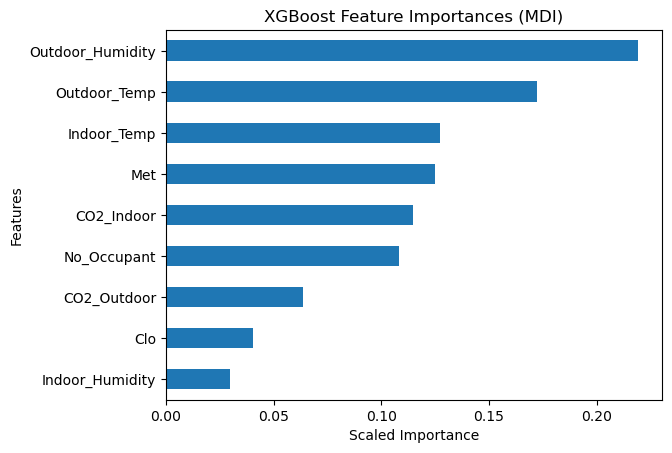

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(xgb.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('XGBoost Feature Importances (MDI)')
plt.xlabel('Scaled Importance')
plt.ylabel('Features')

In [23]:
# Combine feature names and importances
feature_importances_list = list(zip(feat_importances.index, feat_importances.values))

# Print the combined feature names and importances
for feature, importance in feature_importances_list:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Indoor_Humidity, Importance: 0.02951849438250065
Feature: Clo, Importance: 0.040179379284381866
Feature: CO2_Outdoor, Importance: 0.06376314163208008
Feature: No_Occupant, Importance: 0.10814554244279861
Feature: CO2_Indoor, Importance: 0.11448437720537186
Feature: Met, Importance: 0.12487003207206726
Feature: Indoor_Temp, Importance: 0.12740208208560944
Feature: Outdoor_Temp, Importance: 0.17231526970863342
Feature: Outdoor_Humidity, Importance: 0.2193216234445572


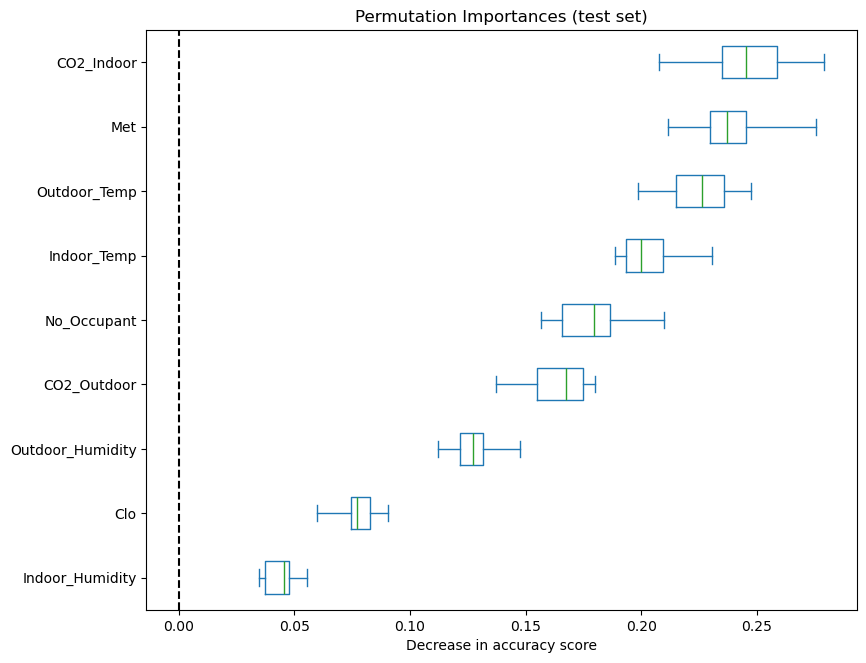

<Figure size 2500x1500 with 0 Axes>

In [24]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

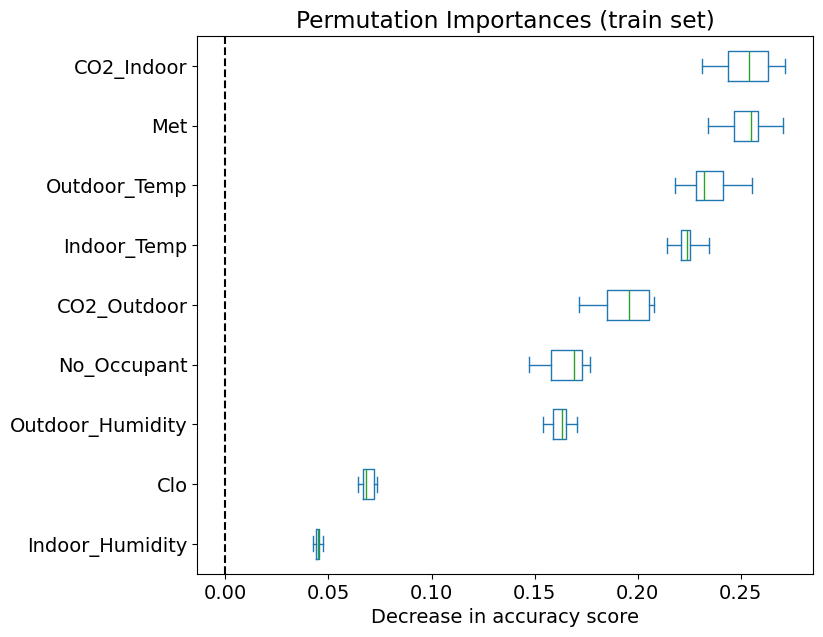

<Figure size 2500x1500 with 0 Axes>

In [26]:
result = permutation_importance(
    xgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

# Sensitivity Analysis

CO2_Outdoor: 6.563057709366954
CO2_Indoor: 2.216011236597521
Outdoor_Humidity: 0.8292247358120066
Outdoor_Temp: 0.43817072699896176
Clo: 0.38265511057820234
Indoor_Temp: 0.30385802015309227
Met: 0.28761095566209116
No_Occupant: 0.1991425789239477
Indoor_Humidity: 0.10991828929875713


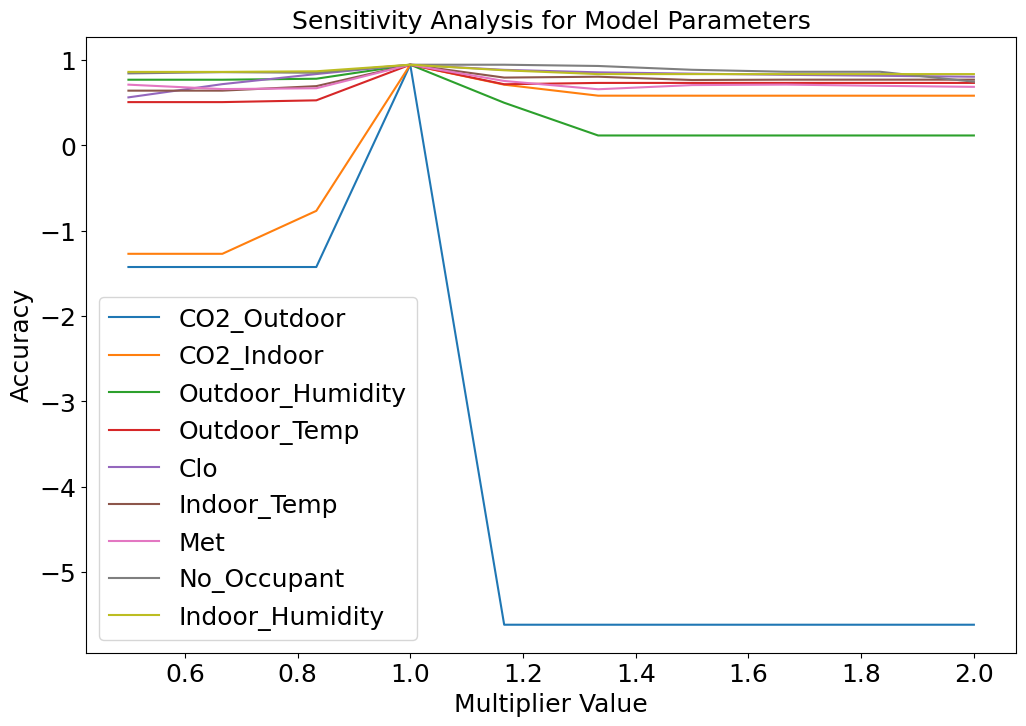

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters to analyze
parameters = ['No_Occupant', 'Met', 'Clo', 'CO2_Outdoor', 'CO2_Indoor', 'Outdoor_Temp', 'Indoor_Temp', 'Outdoor_Humidity', 'Indoor_Humidity']

# Initialize a dictionary to store the sensitivity coefficients
sensitivity_coefficients = {}

# Perform sensitivity analysis for each parameter
for parameter in parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = xgb.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = xgb.score(X_test_modified, y_test)
        results.append(result)

    # Calculate sensitivity coefficient as the range of model performance
    sensitivity_coefficient = max(results) - min(results)
    sensitivity_coefficients[parameter] = sensitivity_coefficient

# Sort parameters by sensitivity coefficient in descending order
sorted_parameters = sorted(sensitivity_coefficients, key=sensitivity_coefficients.get, reverse=True)

# Print the sensitivity coefficients for each parameter
for parameter in sorted_parameters:
    print(f'{parameter}: {sensitivity_coefficients[parameter]}')

# Plot all sensitivity analyses in a single frame
plt.figure(figsize=(12, 8))
for parameter in sorted_parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = xgb.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = xgb.score(X_test_modified, y_test)
        results.append(result)

    plt.plot(np.linspace(0.5, 2.0, 10), results, label=parameter)

plt.xlabel('Multiplier Value', fontsize=18)  # Adjust font size for x-axis label
plt.ylabel('Accuracy', fontsize=18)  # Adjust font size for y-axis label
plt.title('Sensitivity Analysis for Model Parameters', fontsize=18)  # Adjust font size for title
plt.legend(fontsize=18) 
plt.tick_params(axis='both', which='major', labelsize=18)  # Adjust font size for tick labels
plt.show()

In [62]:
import numpy as np
import pandas as pd

In [63]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

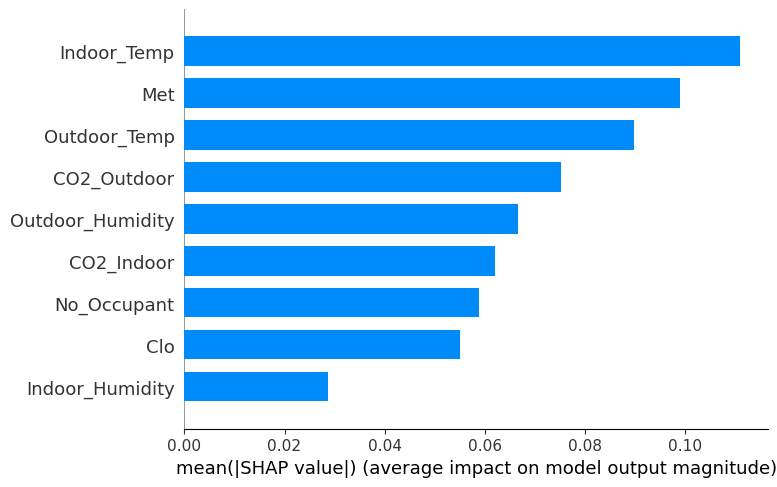

In [64]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar",)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from xgboost import XGBRegressor

# https://stackoverflow.com/questions/73523144/cross-validation-for-random-forest-regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
      
param_grid = {
    
    'max_depth': [70, 80,],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200,300,]}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=0), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [70, 80],
                         'n_estimators': [100, 200, 300]})

In [30]:
grid_search.best_score_

0.943880538642824

In [31]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 70, 'n_estimators': 200}

In [32]:
grid_search.score(X_test,y_test)

0.8733174347771403

In [33]:
xgb = XGBRegressor(
                           n_estimators = grid_search.best_params_['n_estimators'],
                           learning_rate = grid_search.best_params_['learning_rate'],
                           max_depth = grid_search.best_params_['max_depth'],
                           random_state = 0)
    
xgb.fit(X_train, y_train)

n_scores = cross_val_score(xgb, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()

prediction = xgb.predict(X_test)

In [34]:
n_scores = cross_val_score(grid_search, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()
grid_search.predict(X_test)

array([1.7831019, 2.8329957, 2.9538937, 2.6967924, 3.0573287, 2.1896944,
       2.9538937, 2.6967924, 1.9826914, 2.1896944, 3.2642672, 2.5590718,
       2.525352 , 1.9826914, 2.3534918, 4.493322 , 2.8486187, 1.5591519,
       2.0662038, 1.901197 , 2.7184713, 2.3459034, 4.493322 , 1.6612953,
       2.9538937, 3.0984385, 2.564917 , 2.1896944, 3.0280492, 2.0662038,
       2.4629936, 2.3516092, 2.3459034, 3.1556532, 3.0971217, 3.5870008,
       2.066117 , 2.5590718, 2.8329957, 2.0662038, 2.9116933, 2.6967924,
       2.3459034, 1.5591519, 2.3516092, 2.873733 , 2.4629936, 2.3516092,
       2.4348423, 2.1896944, 2.3534918, 2.8486187, 2.7509878, 3.2642672,
       1.9826914, 1.901197 , 2.6967924, 2.3459034, 2.100356 , 2.100356 ,
       2.4629936, 2.525352 , 2.4356341, 2.1298563, 1.901197 , 2.313455 ,
       1.9826914, 2.9538937, 2.4629936, 2.1896944, 3.427698 , 1.9826914,
       2.525352 , 1.8619294, 1.8188282, 2.4348423, 2.5590718, 2.1896944,
       3.1836228, 2.1759636, 2.0997353, 1.8512291, 